<a href="https://colab.research.google.com/github/DiazPrisheilaDharmawan/DataAnalystics-Zenius/blob/main/Assessment_3_%5BDiaz_Prisheila_Dharmawan%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import Data

## Data Frame 1

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/economic-damage-from-natural-disasters.csv")

In [ ]:
df1.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


## Data Frame 2

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv")

In [ ]:
df2.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


## Menggabungkan dua dataset

In [ ]:
joindf = pd.merge(df1[['Entity', 'Year', 'Total economic damage from natural disasters (US$)']], df2[['Entity', 'Year', 'Number of reported natural disasters (reported disasters)']], on=['Entity', 'Year'])
joindf.head()

,Entity,Year,Total economic damage from natural disasters (US$),Number of reported natural disasters (reported disasters)
0,All natural disasters,1900,30000000,5
1,All natural disasters,1901,0,2
2,All natural disasters,1902,0,9
3,All natural disasters,1903,480000000,8
4,All natural disasters,1904,0,2


# Descriptive and Inferential Statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df1['Total economic damage from natural disasters (US$)'].describe()

count            561.00
mean     11469661062.39
std      31995254024.42
min                0.00
25%         68500000.00
50%        840000000.00
75%       5444777000.00
max     364093168000.00
Name: Total economic damage from natural disasters (US$), dtype: float64

Jumlah data dalam kolom tersebut adalah 561, menunjukkan ada 561 pengamatan dalam dataset tersebut. Rata-rata kerusakan ekonomi dari bencana alam adalah sekitar 11.47 miliar USD, merupakan nilai tengah hasil penjumlahan dan pembagian data. Standar deviasi sekitar 31.99 miliar USD, mengukur sebaran data dari rata-rata, dengan standar deviasi tinggi menunjukkan variasi yang besar dalam kerusakan ekonomi. Nilai minimum dalam data adalah 0.00 USD, menandakan setidaknya satu tahun dengan kerusakan ekonomi nol. Quartile membagi data menjadi empat bagian sekitar rata-rata. Quartile pertama (25%) sekitar 68.5 juta USD, artinya 25% data berada di bawah nilai ini. Quartile kedua (50%) atau median adalah sekitar 840 juta USD, artinya 50% data berada di bawah nilai ini. Quartile ketiga (75%) adalah sekitar 5.44 miliar USD, artinya 75% data berada di bawah nilai ini. Nilai maksimum dalam data adalah sekitar 364 miliar USD, merupakan kerusakan ekonomi tertinggi dalam dataset tersebut.

In [ ]:
df2['Number of reported natural disasters (reported disasters)'].describe()

count    828.000000
mean      31.913043
std       67.393086
min        1.000000
25%        2.000000
50%        7.000000
75%       23.000000
max      432.000000
Name: Number of reported natural disasters (reported disasters), dtype: float64

Jumlah data dalam kolom tersebut adalah 828, menunjukkan ada 828 pengamatan dalam dataset tersebut. Rata-rata jumlah bencana alam yang dilaporkan adalah sekitar 31.91, merupakan nilai tengah hasil penjumlahan dan pembagian data. Standar deviasi sekitar 67.39, mengukur sebaran data dari rata-rata, dengan standar deviasi tinggi menunjukkan variasi yang besar dalam jumlah bencana. Nilai minimum dalam data adalah 1, menandakan setidaknya satu tahun dengan jumlah bencana satu. Quartile membagi data menjadi empat bagian sekitar rata-rata. Quartile pertama (25%) sekitar 2, artinya 25% data berada di bawah nilai ini. Quartile kedua (50%) atau median adalah sekitar 7, artinya 50% data berada di bawah nilai ini. Quartile ketiga (75%) adalah sekitar 23, artinya 75% data berada di bawah nilai ini. Nilai maksimum dalam data adalah sekitar 432, merupakan jumlah bencana tertinggi dalam dataset tersebut.

## Inferential Statistics

In [ ]:
# Uji Hipotesis Tidak Terkait (Independent Samples T-Test)
sample1 = df1[df1['Year'] == 2015]['Total economic damage from natural disasters (US$)']
sample2 = df2[df2['Year'] == 2015]['Number of reported natural disasters (reported disasters)']

t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

print("Inferential Statistics:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol ditolak, rata-rata kerusakan ekonomi pada tahun 1903 berbeda secara signifikan dari jumlah bencana yang dilaporkan.")
else:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol.")

Inferential Statistics:
t-statistic: 2.0634038302690985
p-value: 0.07297312788525598
Tidak ada cukup bukti untuk menolak hipotesis nol.


Pertanyaan Penelitian:

Apakah ada perbedaan yang signifikan antara rata-rata kerusakan ekonomi dari bencana alam pada tahun 2015 dengan jumlah bencana alam yang dilaporkan antara dua dataset?

Hasil Uji Hipotesis:

Nilai t-statistic adalah 2.0634038302690985, mengukur sejauh mana perbedaan antara rata-rata dua sampel dalam hal kerusakan ekonomi dan jumlah bencana yang dilaporkan. Nilai p-value adalah 0.07297312788525598, yang merupakan probabilitas bahwa perbedaan yang diamati antara dua sampel adalah akibat dari kebetulan semata.

Interpretasi Hasil:

Pada tingkat signifikansi α = 0.05, p-value yang dihasilkan adalah 0.07297312788525598, lebih besar dari α (0.05). Oleh karena itu, tidak ada cukup bukti untuk menolak hipotesis nol, yang menyatakan bahwa tidak ada perbedaan signifikan antara rata-rata kerusakan ekonomi dari bencana alam pada tahun 2015 dan jumlah bencana yang dilaporkan antara dua dataset. Dengan kata lain, perbedaan yang diamati mungkin disebabkan oleh kebetulan atau variasi acak, bukan oleh perbedaan yang signifikan.

Hasil uji hipotesis menunjukkan bahwa pada tingkat signifikansi yang ditetapkan (α = 0.05), tidak ada cukup bukti statistik untuk mendukung hipotesis bahwa rata-rata kerusakan ekonomi pada tahun 2015 berbeda secara signifikan dari jumlah bencana yang dilaporkan antara dua dataset.

# EDA (Exploratory Data Analysis)

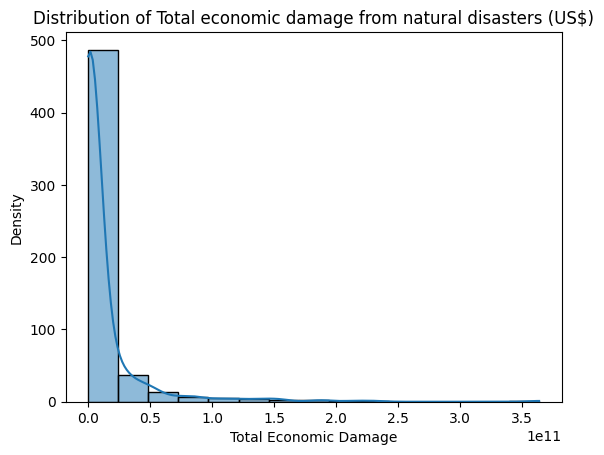

In [ ]:
economic_damage = joindf['Total economic damage from natural disasters (US$)']
sns.histplot(economic_damage, kde=True, bins=15)
plt.xlabel('Total Economic Damage')
plt.ylabel('Density')
plt.title('Distribution of Total economic damage from natural disasters (US$)')
plt.show()

Distribusi data kerusakan ekonomi akibat bencana alam tampaknya cenderung condong ke kanan (positively skewed). Ini berarti bahwa sebagian besar observasi memiliki kerusakan ekonomi yang lebih rendah, tetapi ada beberapa kasus yang memiliki kerusakan ekonomi yang sangat tinggi. Puncak (peak) distribusi terletak pada nilai kerusakan ekonomi yang lebih rendah, yang menunjukkan bahwa mayoritas bencana alam menyebabkan kerusakan ekonomi yang relatif kecil. Ada beberapa outlier atau nilai-nilai ekstrim yang jauh lebih tinggi dari mayoritas data, yang dapat dilihat dari ekor panjang di sebelah kanan distribusi. Sebagian besar bencana alam memiliki dampak ekonomi yang terbatas, tetapi ada beberapa bencana alam yang memiliki dampak ekonomi yang sangat besar. Ini dapat menggambarkan kerentanan yang berbeda dari berbagai jenis bencana alam.


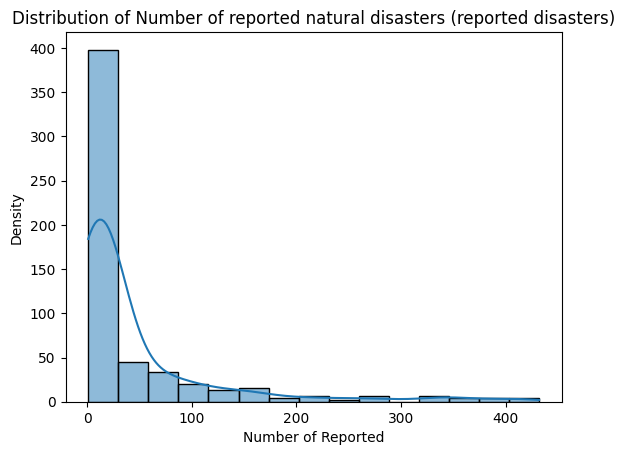

In [ ]:
reported_disasters = joindf['Number of reported natural disasters (reported disasters)']
sns.histplot(reported_disasters, kde=True, bins=15)
plt.xlabel('Number of Reported')
plt.ylabel('Density')
plt.title('Distribution of Number of reported natural disasters (reported disasters)')
plt.show()

Distribusi data jumlah bencana alam yang dilaporkan memiliki kemiringan positif (positively skewed), yang berarti sebagian besar tahun memiliki jumlah bencana alam yang rendah, sementara ada beberapa tahun yang memiliki jumlah bencana alam yang lebih tinggi. Puncak (peak) distribusi terletak pada jumlah bencana alam yang rendah, menunjukkan bahwa sebagian besar tahun memiliki jumlah bencana alam yang terbatas. Terdapat beberapa tahun dengan jumlah bencana alam yang signifikan, yang terlihat dari ekor panjang di sebelah kanan distribusi. Mayoritas tahun memiliki jumlah bencana alam yang sedikit atau terbatas, yang mungkin mencerminkan variasi alamiah dalam kejadian bencana alam dari tahun ke tahun. Ada tahun-tahun tertentu yang mencatat jumlah bencana alam yang lebih tinggi, yang dapat menggambarkan tahun-tahun dengan tingkat aktivitas bencana alam yang lebih tinggi atau dampak yang lebih besar.

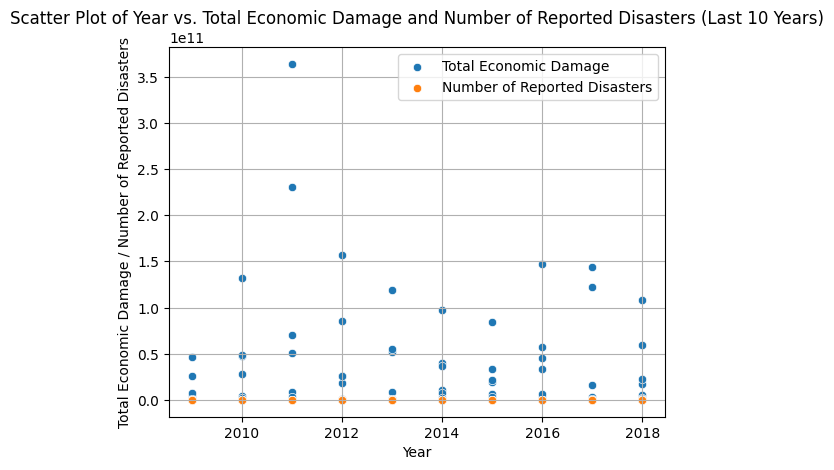

In [ ]:
latest_10_years = joindf['Year'].max() - 9
joindf_last_10_years = joindf[joindf['Year'] >= latest_10_years]

sns.scatterplot(data=joindf_last_10_years, x='Year', y='Total economic damage from natural disasters (US$)', label='Total Economic Damage')
sns.scatterplot(data=joindf_last_10_years, x='Year', y='Number of reported natural disasters (reported disasters)', label='Number of Reported Disasters')
plt.xlabel('Year')
plt.ylabel('Total Economic Damage / Number of Reported Disasters')
plt.title('Scatter Plot of Year vs. Total Economic Damage and Number of Reported Disasters (Last 10 Years)')
plt.legend()
plt.grid(True)
plt.show()

Hasil dari scatter plot ini memberikan wawasan mengenai korelasi antara tahun dengan total kerusakan ekonomi dan jumlah bencana alam. Dalam plot ini, kita dapat menganalisis pola dan tren apakah terjadi peningkatan atau penurunan total kerusakan ekonomi dan jumlah bencana alam dari 10 tahun terakhir dari data (2009-2018).

Data menunjukkan bahwa pada tahun 2011, terdapat tingkat kerusakan ekonomi tertinggi akibat bencana alam, mencapai 364093168000 dalam kategori 'All natural disasters' dengan jumlah bencana alam yang dilaporkan sebanyak 334. Pada tahun yang sama, peringkat kedua tertinggi juga terjadi dengan nilai sebesar 230299850000 pada 'Earthquake' dan jumlah bencana alam yang dilaporkan sebanyak 30. Sementara itu, tingkat kerusakan ekonomi terendah tercatat pada tahun 2017 yaitu 0 dalam kategori 'Volcanic activity' dengan jumlah bencana alam yang dilaporkan hanya sebanyak 2.

Kesimpulan yang dapat ditarik adalah bahwa terdapat korelasi antara jumlah bencana alam yang dilaporkan dan total kerusakan ekonomi akibat bencana alam. Semakin banyak jumlah bencana alam yang dilaporkan, maka kerusakan ekonomi cenderung meningkat. Ini menunjukkan bahwa jumlah laporan bencana alam dapat menjadi indikator penting untuk memperkirakan tingkat kerusakan ekonomi yang mungkin terjadi akibat bencana alam.

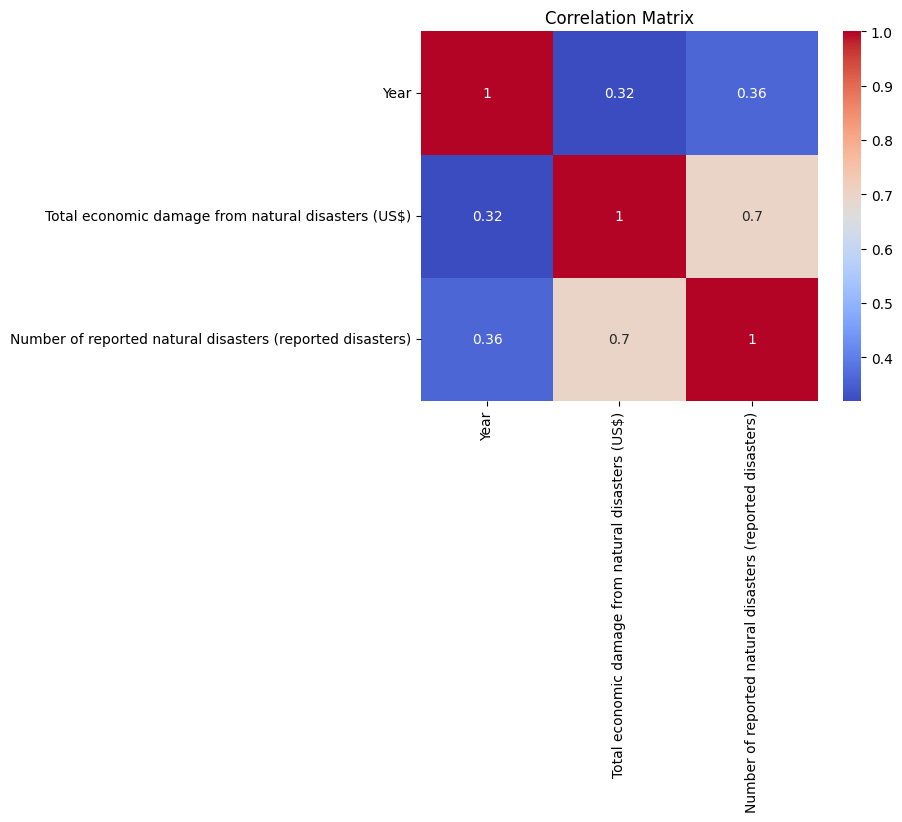

In [ ]:
correlation_matrix = joindf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Matriks korelasi mengukur tingkat hubungan antara variabel tahun dengan total kerusakan ekonomi dan jumlah bencana alam pada dataset. Korelasi berkisar antara -1 hingga 1, dengan -1 menunjukkan korelasi negatif sempurna, 1 menunjukkan korelasi positif sempurna, dan 0 menunjukkan tidak ada korelasi.

Hasil korelasi antara tahun dengan total kerusakan ekonomi dan jumlah bencana alam adalah 0.32 dan 0,36, ini menunjukkan bahwa hubungan dalam dataset relatif lemah. Dengan kata lain, tahun tidak memiliki korelasi yang signifikan karena korelasi ini hampir nol. Heatmap korelasi menggambarkan visualisasi dengan warna yang berbeda untuk mencerminkan tingkat korelasi. Pada heatmap, kita dapat melihat bahwa warna heatmap mendekati warna biru muda, yang menunjukkan korelasi yang sangat lemah antara tahun dengan total kerusakan ekonomi dan jumlah bencana alam. Hasil korelasi yang mendekati nol menunjukkan bahwa tahun (variabel independen) dan total kerusakan ekonomi dan jumlah bencana alam (variabel dependen) dalam dataset ini tidak memiliki hubungan linier yang kuat. Ini berarti bahwa kenaikan atau penurunan tahun tidak berdampak secara langsung atau kuat pada total kerusakan ekonomi dan jumlah bencana alam. Faktor-faktor lain atau variabel-variabel lain mungkin memiliki peran yang lebih dominan dalam mengatur total kerusakan ekonomi dan jumlah bencana alam dalam dataset ini.


# Statistical Modeling

## Regression

In [ ]:
data = joindf[['Year','Total economic damage from natural disasters (US$)','Number of reported natural disasters (reported disasters)']]
data.head()

,Year,Total economic damage from natural disasters (US$),Number of reported natural disasters (reported disasters)
0,1900,30000000,5
1,1901,0,2
2,1902,0,9
3,1903,480000000,8
4,1904,0,2


### Visualisasi data

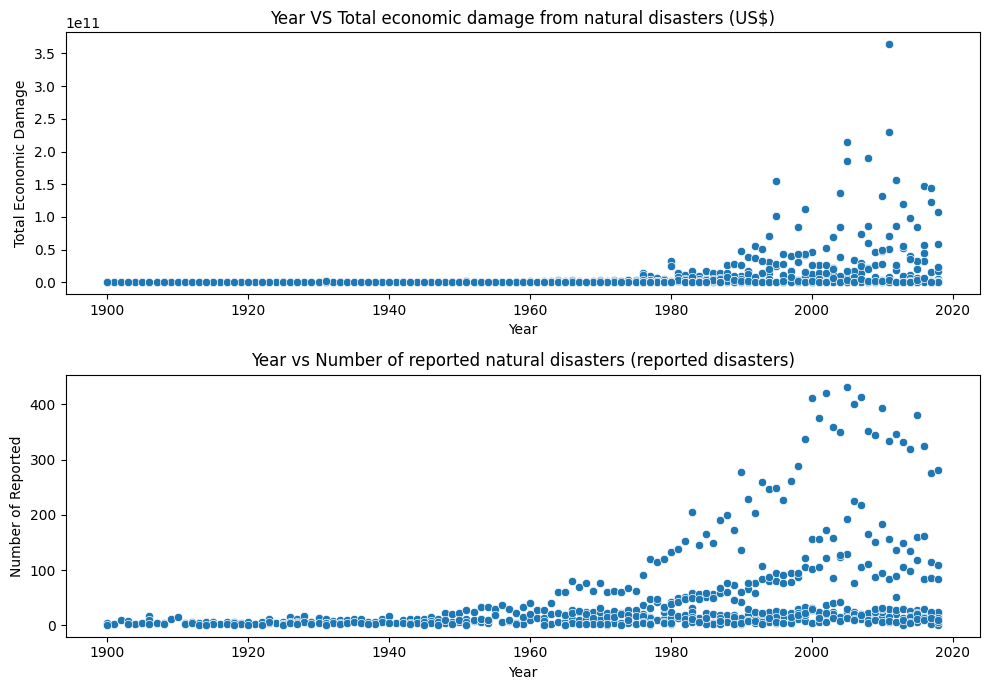

In [ ]:
fig, (ax1, ax2 )= plt.subplots(2,1,figsize=(10,7))

sns.scatterplot(x='Year', y='Total economic damage from natural disasters (US$)', data=data, ax=ax1)
ax1.set_title('Year VS Total economic damage from natural disasters (US$)', fontsize=12)
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Total Economic Damage', fontsize=10)

sns.scatterplot(x='Year', y='Number of reported natural disasters (reported disasters)', data=data, ax=ax2)
ax2.set_title('Year vs Number of reported natural disasters (reported disasters)', fontsize=12)
ax2.set_xlabel('Year', fontsize=10)
ax2.set_ylabel('Number of Reported', fontsize=10)
plt.tight_layout()

### Perhitungan regresi ganda ( y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn )

In [ ]:
data.columns = ['x','y1','y2']
data.head()

,x,y1,y2
0,1900,30000000,5
1,1901,0,2
2,1902,0,9
3,1903,480000000,8
4,1904,0,2


In [ ]:
x = data['x']
y = data[['y1','y2']]
model = LinearRegression().fit(y, x)

In [ ]:
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)
b2 = round(float(model.coef_[1]),3)
print('intercept (b0 ) : ', b0)
print('slope (b1)      : ', b1)
print('slope (b2)      : ', b2)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * y1  + '+str(b2)+' * y2'
print(textstr)

intercept (b0 ) :  1971.041
slope (b1)      :  0.0
slope (b2)      :  0.104
 
y = 1971.041 + 0.0 * y1  + 0.104 * y2


Koefisien slope (b1 dan b2) mengukur seberapa besar perubahan dalam variabel independen (X) mempengaruhi perubahan dalam variabel dependen (Y). Semakin besar nilai koefisien slope, semakin besar pengaruhnya. Intercept (b0) adalah titik di mana garis regresi memotong sumbu Y ketika nilai X = 0, ini memberikan nilai Y ketika variabel independen (X) sama dengan 0.

Slope (b1) untuk 'y1' adalah sekitar 0.0, yang berarti bahwa tidak ada hubungan linier antara 'x' dan 'y1'. Dengan kata lain, perubahan dalam 'y1' tidak mempengaruhi 'x'. Slope (b2) untuk 'y2' adalah sekitar 0.104, yang berarti bahwa ada hubungan linier positif antara 'x' dan 'y2'. Dengan kata lain, perubahan dalam 'y2' berkontribusi positif terhadap perubahan 'x'. Intercept (b0) adalah 1971.041, nilai y ketika variabel independen (x) adalah nol.

### Linear regression

In [ ]:
# Pisahkan variabel independen (X) dan dependen (y)
X = data['x']
y = data[['y1', 'y2']]

# Bagi data menjadi data pelatihan (train) dan data pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model pada data pelatihan
model.fit(y_train, X_train)

# Buat prediksi
y_pred = model.predict(y_test)

# Evaluasi model
mse = mean_squared_error(X_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(X_test, y_pred)
mae = mean_absolute_error(X_test, y_pred)
mape = np.mean(np.abs((X_test - y_pred) / X_test)) * 100

# Tampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse:.8f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.8f}')
print(f'R-squared: {r_squared:.8f}')
print(f'Mean Absolute Error (MAE): {mae:.8f}')
print(f"Mean Absolute Percentage Error (MAPE): {mape :.8f}%")

Mean Squared Error (MSE): 760.90257684
Root Mean Squared Error (RMSE): 27.58446260
R-squared: 0.10174478
Mean Absolute Error (MAE): 21.84325682
Mean Absolute Percentage Error (MAPE): 1.10707461%


Data dipisahkan menjadi variabel independen (x) dan variabel dependen (y), membagi data menjadi dua yaitu data latih dan uji. Model regresi linear diinisialisasi dan dilatih pada data latih dengan variabel independen (x) sebagai fitur dan variabel dependen (y1 dan y2) sebagai target. Tujuan dari regresi ini adalah untuk memahami hubungan antara x dengan  y1 dan y2. Setelah model dilatih, prediksi dilakukan pada data uji untuk melihat sejauh mana model dapat memprediksi variabel dependen y1 dan y2 berdasarkan variabel independen x.

Metrik evaluasi digunakan untuk mengukur kualitas prediksi, seperti R-squared mengukur sejauh mana variasi dalam variabel dependen (y) dapat dijelaskan oleh variabel independen (x) dalam model. Semakin tinggi R-squared, semakin baik model ini menjelaskan variasi dalam data. R-squared bernilai antara 0 hingga 1. Nilai 0 berarti model tidak menjelaskan variasi apapun, sedangkan nilai 1 berarti model menjelaskan semua variasi dalam data.

Nilai R-squared sekitar 0.10174478, yang menunjukkan bahwa model tidak mampu menjelaskan variasi yang signifikan dalam y1 dan y2 berdasarkan x. Dari hasil evaluasi tersebut, dapat disimpulkan bahwa model regresi linear yang digunakan tidak cukup baik dalam menjelaskan variasi dalam variabel dependen y1 dan y2 berdasarkan variabel independen x. Nilai R-squared yang rendah menunjukkan bahwa model tidak mampu menjelaskan banyak variasi dalam data. Oleh karena itu, mungkin diperlukan model yang lebih kompleks atau peningkatan fitur yang digunakan untuk meningkatkan kualitas prediksi.

Text(0, 0.5, 'Total Economic Damage')

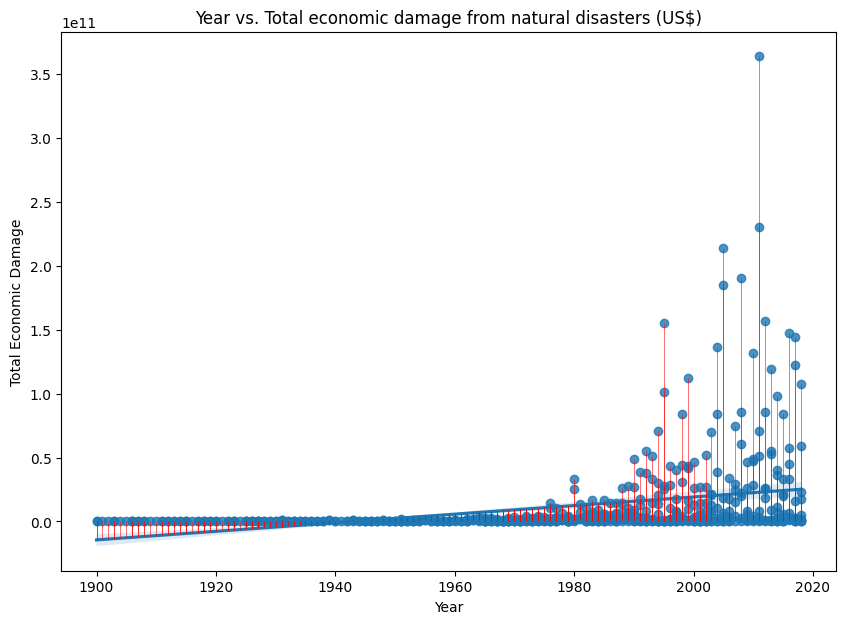

In [ ]:
fit = np.polyfit(data['x'], data['y1'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='x', y='y1', data=data, ax=ax)
plt.vlines(data['x'], y_hat, data['y1'], lw=0.4, colors='r')

ax.set_title('Year vs. Total economic damage from natural disasters (US$)', fontsize=12)
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Total Economic Damage', fontsize=10)

Text(0, 0.5, 'Number of reported natural disasters')

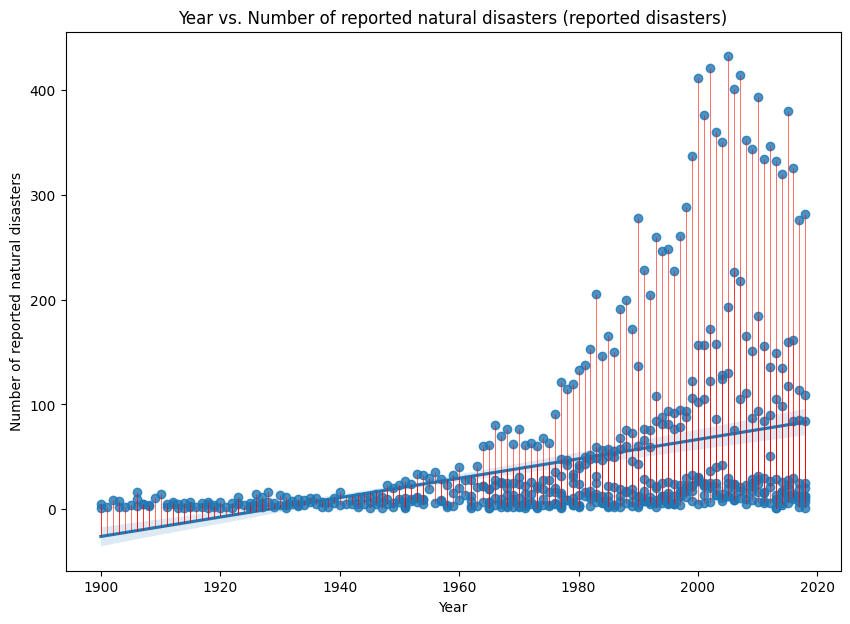

In [ ]:
fit = np.polyfit(data['x'], data['y2'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x='x', y='y2', data=data, ax=ax)
plt.vlines(data['x'], y_hat, data['y2'], lw=0.4, colors='r')

ax.set_title('Year vs. Number of reported natural disasters (reported disasters)', fontsize=12)
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Number of reported natural disasters', fontsize=10)

Dengan model regresi linear, kita dapat melakukan prediksi untuk nilai Y berdasarkan nilai X yang belum terlihat sebelumnya. Ini dapat digunakan untuk prediksi. Kita juga dapat menghasilkan kesimpulan atau inferensi tentang bagaimana X mempengaruhi Y dalam konteks masalah Anda. Hasil analisis regresi dapat digunakan untuk membuat kesimpulan yang lebih umum tentang bagaimana variabel independen mempengaruhi variabel dependen dalam populasi yang lebih luas.

## K-means


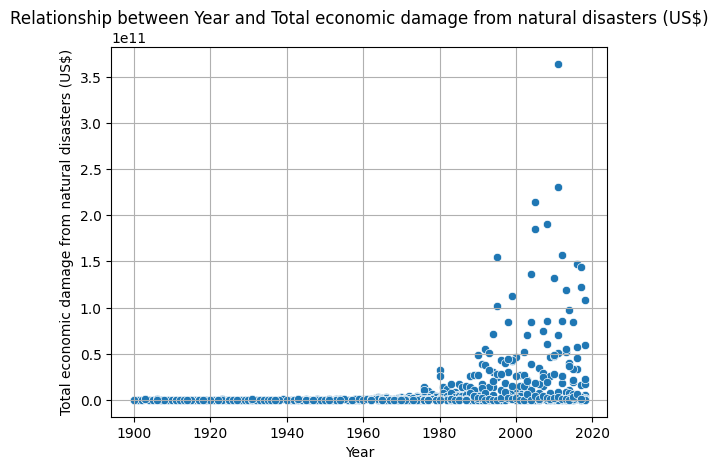

In [ ]:
years = joindf['Year']
economic_damage = joindf['Total economic damage from natural disasters (US$)']

sns.scatterplot(x=years, y=economic_damage)
plt.xlabel('Year')
plt.ylabel('Total economic damage from natural disasters (US$)')
plt.title('Relationship between Year and Total economic damage from natural disasters (US$)')
plt.grid(True)
plt.show()

Dari grafik persebaran diatas kita dapat melihat hubungan antara tahun dan total kerusakan ekonomi akibat bencana alam. Pada tahun 1901-1910 merupakan angka terendah dari total kerusakan ekonomi yang berada pada 0 atau tidak ada kerusakan yang disebabkan. Sedangkan, pada tahun 2011 total kerusakan ekonomi berada pada 364093168000, yang mana merupakan nilai tertinggi dari total kerusakan ekonomi akibat bencana alam.

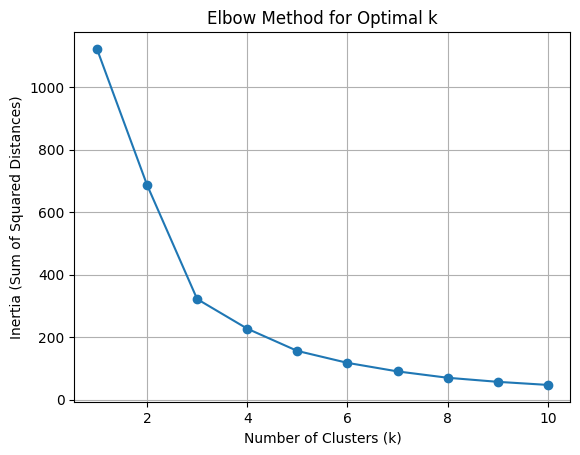

In [ ]:
features = joindf[['Year', 'Total economic damage from natural disasters (US$)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Dalam analisis K-means clustering yang dilakukan, pertama-tama menyiapkan variabel-variabel dari dataset. Kemudian, mencoba berbagai jumlah cluster (k) untuk menentukan jumlah cluster yang optimal dengan menggunakan metode siku (elbow method). Dalam plot Elbow Method, mencari siku atau titik di mana penurunan inersia (Sum of Squared Distances) mulai melambat. Pada titik ini, penambahan cluster baru tidak memberikan penurunan inersia yang signifikan. Dalam kasus, titik elbow berada di k=3, yang menunjukkan bahwa tiga cluster adalah jumlah cluster optimal.

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.predict(scaled_features)

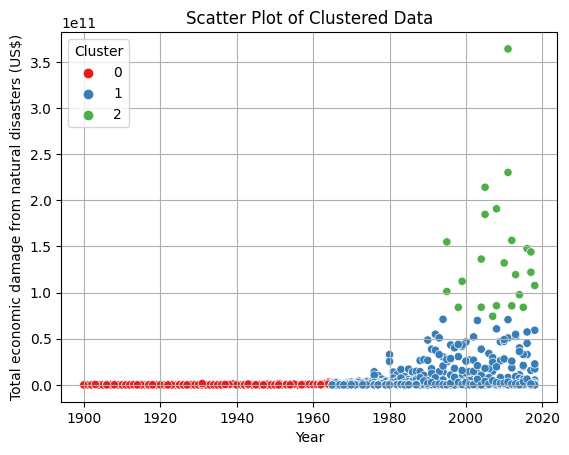

In [ ]:
joindf['cluster'] = cluster_labels

sns.scatterplot(x='Year', y='Total economic damage from natural disasters (US$)', hue='cluster', data=joindf, palette='Set1')
plt.title('Scatter Plot of Clustered Data')
plt.xlabel('Year')
plt.ylabel('Total economic damage from natural disasters (US$)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Scatter plot berwarna menunjukkan hasil clustering. Data diplot berdasarkan dua variabel, yaitu "Year" dan "Total economic damage from natural disasters (US$)", dengan warna yang berbeda untuk setiap cluster. Dalam scatter plot, kita dapat melihat bahwa data telah dikelompokkan menjadi tiga kelompok yang berbeda. Cluster 0, 1, dan 2 memiliki ciri-ciri yang berbeda, yang terlihat dari lokasi titik-titik data mereka dalam plot. Seperti cluster 2 warna hijau, merupakan tahun tertinggi dengan total kerusakan ekonomi akibat bencana alam  tertinggi. Hasil clustering dapat digunakan untuk menganalisis total kerusakan ekonomi akibat bencana alam berdasarkan pengelompokkan tahun dan kerusakan ekonomi dari yg kecil, sedang, hingga yang tertinggi.  

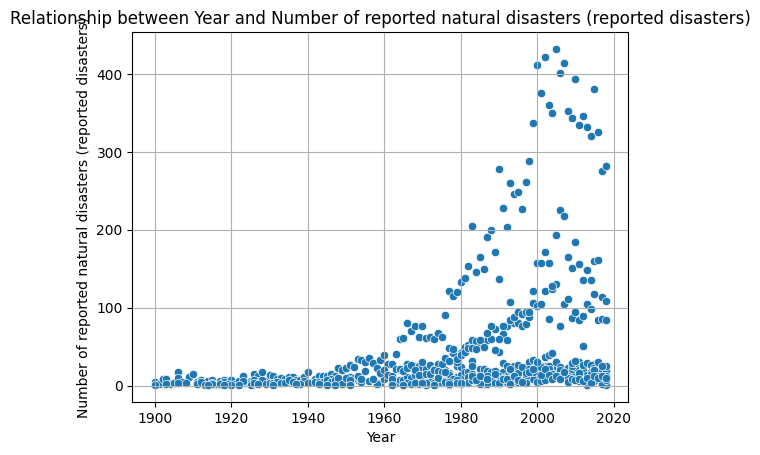

In [ ]:
years = joindf['Year']
reported_disasters = joindf['Number of reported natural disasters (reported disasters)']

sns.scatterplot(x=years, y=reported_disasters)
plt.xlabel('Year')
plt.ylabel('Number of reported natural disasters (reported disasters)')
plt.title('Relationship between Year and Number of reported natural disasters (reported disasters)')
plt.grid(True)
plt.show()

Dari grafik persebaran diatas kita dapat melihat hubungan antara tahun dan jumlah bencana alam yang dilaporkan. Pada tahun 1903-1963 merupakan angka terendah dari jumlah bencana alam yang dilaporkan yang berada pada 1. Sedangkan, pada tahun 2005 jumlah bencana alam berada pada 432, yang mana merupakan nilai tertinggi dari jumlah bencana alam yang dilaporkan.

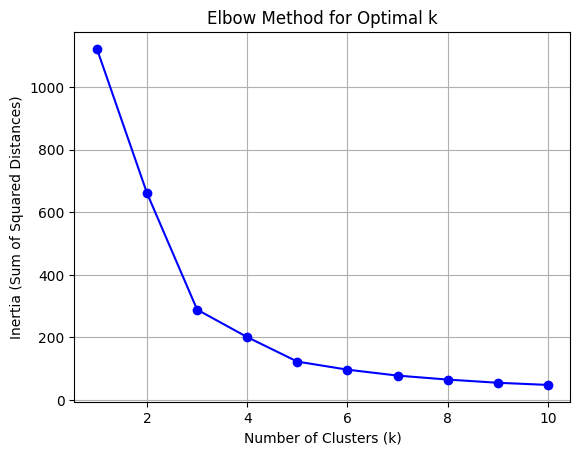

In [ ]:
features = joindf[['Year', 'Number of reported natural disasters (reported disasters)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Dalam analisis K-means clustering yang dilakukan, pertama-tama menyiapkan variabel-variabel dari dataset. Kemudian, mencoba berbagai jumlah cluster (k) untuk menentukan jumlah cluster yang optimal dengan menggunakan metode siku (elbow method). Dalam plot Elbow Method, mencari siku atau titik di mana penurunan inersia (Sum of Squared Distances) mulai melambat. Pada titik ini, penambahan cluster baru tidak memberikan penurunan inersia yang signifikan. Dalam kasus, titik elbow berada di k=4, yang menunjukkan bahwa empat cluster adalah jumlah cluster optimal.

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.predict(scaled_features)

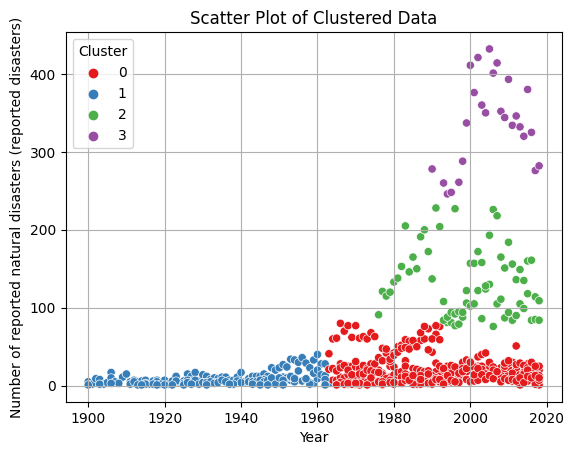

In [ ]:
joindf['cluster'] = cluster_labels

sns.scatterplot(x='Year', y='Number of reported natural disasters (reported disasters)', hue='cluster', data=joindf, palette='Set1')
plt.title('Scatter Plot of Clustered Data')
plt.xlabel('Year')
plt.ylabel('Number of reported natural disasters (reported disasters)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Scatter plot berwarna menunjukkan hasil clustering. Data diplot berdasarkan dua variabel, yaitu "Year" dan "Number of reported natural disasters (reported disasters)", dengan warna yang berbeda untuk setiap cluster. Dalam scatter plot, kita dapat melihat bahwa data telah dikelompokkan menjadi empat kelompok yang berbeda. Cluster 0, 1, 2, dan 3 memiliki ciri-ciri yang berbeda, yang terlihat dari lokasi titik-titik data mereka dalam plot. Seperti cluster 1 warna biru, merupakan tahun terendah dengan jumlah bencana yang dilaporkan rendah. Hasil clustering dapat digunakan untuk menganalisis jumlah bencana yang dilaporkan berdasarkan pengelompokkan tahun dan angka bencana dari yg kecil, sedang, hingga yang tertinggi.  